In [2]:
import requests 
from bs4 import BeautifulSoup
import re
import dateutil

In [3]:
result=requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")

In [4]:
assert result.status_code==200

In [5]:
src=result.content
document=BeautifulSoup(src,'lxml')

In [6]:
table=document.find('table')
table

<table class="wikitable sortable">
<tbody><tr>
<th>Rank</th>
<th><a href="/wiki/List_of_sovereign_states" title="List of sovereign states">Country</a> / <a href="/wiki/Dependent_territory" title="Dependent territory">Dependency</a></th>
<th><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">Region</a></th>
<th>Population</th>
<th>Percentage of the world</th>
<th>Date</th>
<th><span class="nowrap">Source (official or from</span> the <a href="/wiki/United_Nations" title="United Nations">United Nations</a>)</th>
<th>Notes
</th></tr>
<tr>
<td align="center"><b>–</b>
</td>
<td><b>World</b>
</td>
<td align="center"></td>
<td style="text-align:center"><b> 7,937,042,000</b></td>
<td style="text-align:right"><b>100%</b></td>
<td><b><span data-sort-value="000000002022-03-17-0000" style="white-space:nowrap">17 Mar 2022</span></b></td>
<td style="text-align:left"><b>UN projection<sup class="reference" id="cite_ref-unpop_1-1"><a href="#cite_note-unpop-1">[1]</a></sup></b></td

In [7]:
assert table.find('th').get_text()=='Rank'

In [8]:
rows=table.find_all('tr')
rows

[<tr>
 <th>Rank</th>
 <th><a href="/wiki/List_of_sovereign_states" title="List of sovereign states">Country</a> / <a href="/wiki/Dependent_territory" title="Dependent territory">Dependency</a></th>
 <th><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">Region</a></th>
 <th>Population</th>
 <th>Percentage of the world</th>
 <th>Date</th>
 <th><span class="nowrap">Source (official or from</span> the <a href="/wiki/United_Nations" title="United Nations">United Nations</a>)</th>
 <th>Notes
 </th></tr>,
 <tr>
 <td align="center"><b>–</b>
 </td>
 <td><b>World</b>
 </td>
 <td align="center"></td>
 <td style="text-align:center"><b> 7,937,042,000</b></td>
 <td style="text-align:right"><b>100%</b></td>
 <td><b><span data-sort-value="000000002022-03-17-0000" style="white-space:nowrap">17 Mar 2022</span></b></td>
 <td style="text-align:left"><b>UN projection<sup class="reference" id="cite_ref-unpop_1-1"><a href="#cite_note-unpop-1">[1]</a></sup></b></td>
 <td>
 </td></tr>,


In [9]:
cells_text=[]
for row in rows[2:-1]:
    cells = row.find_all(["td", "th"])
    
    cells_text = [cell.get_text(strip=True) for cell in cells]
    (rank, country, region, population, percentage, updated_at, source, comment) = cells_text
    
    # Clean population using a regular expression str("1,404,890,600") -> int(1404890600)
    population = int(re.sub(',', '', population))   
    
    # Clean country name
    country = re.findall(r'[\w\s()\.]+', country)[0]
    
    # Convert percentage to floats
    percentage = float(re.findall(r'[\d\.]+', percentage)[0])    
    
    # Convert updated_at to date object
    updated_at = dateutil.parser.parse(updated_at)    
    
    print(f"{rank}, {country}, {population}, {percentage}, {updated_at}, {source}")
    
   

1, China, 1412600000, 17.8, 2021-12-31 00:00:00, National annual estimate[2]
2, India, 1374305400, 17.3, 2022-03-17 00:00:00, National population clock[3]
3, United States, 332566652, 4.19, 2022-03-17 00:00:00, National population clock[4]
4, Indonesia, 272248500, 3.43, 2021-07-01 00:00:00, National annual estimate[5]
5, Pakistan, 225200000, 2.84, 2021-07-01 00:00:00, UN projection[1]
6, Brazil, 214389640, 2.7, 2022-03-17 00:00:00, National population clock[6]
7, Nigeria, 211401000, 2.66, 2021-07-01 00:00:00, UN projection[1]
8, Bangladesh, 172388884, 2.17, 2022-03-17 00:00:00, National population clock[7]
9, Russia, 145478097, 1.83, 2022-01-01 00:00:00, National annual estimate[8]
10, Mexico, 126014024, 1.59, 2020-03-02 00:00:00, 2020 census result[9]
11, Japan, 125340000, 1.58, 2022-02-01 00:00:00, Monthly national estimate[10]
12, Ethiopia, 117876000, 1.49, 2021-07-01 00:00:00, UN projection[1]
13, Philippines, 111628046, 1.41, 2022-03-17 00:00:00, Official 2020 census result[11]
14

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplot inline 

UsageError: Line magic function `%matplot` not found.


In [16]:
wiki_data=pd.read_csv("D:\MY STUDY MATERIALS\SOME DATAS FOR ANALYSIS\wikipedia.csv")
wiki_data

,Rank,Country,Population,Percentage,Updated,Source
0,1,China,1412600000,17.80,2021-12-31,National annual estimate[2]
1,2,India,1374305400,17.30,2022-03-17,National population clock[3]
2,3,United States,332566652,4.19,2022-03-17,National population clock[4]
3,4,Indonesia,272248500,3.43,2021-07-01,National annual estimate[5]
4,5,Pakistan,225200000,2.84,2021-07-01,UN projection[1]
...,...,...,...,...,...,...
235,–,Norfolk Island(Australia),1734,0.00,2020-06-30,National annual estimate[195]
236,–,Niue(New Zealand),1549,0.00,2021-07-01,National annual projection[92]
237,–,Tokelau(New Zealand),1501,0.00,2021-07-01,National annual projection[92]
238,195,Vatican City,825,0.00,2019-02-01,Monthly national estimate[196]


In [14]:
import pandas as pd
col_names=["Rank", "Country", "Region", "population", "Percentage", "Updated_at", "Source"]
wiki=pd.DataFrame([rank, country, region, population, percentage, updated_at, source],index=col_names)
wiki

,0
Rank,–
Country,Cocos (Keeling) Islands(Australia)
Region,Oceania
population,573
Percentage,0.0
Updated_at,2020-06-30 00:00:00
Source,National annual estimate[195]


In [18]:
wiki_data.shape

(240, 6)

In [19]:
wiki_data.index

RangeIndex(start=0, stop=240, step=1)

In [22]:
wiki_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        240 non-null    object 
 1   Country     240 non-null    object 
 2   Population  240 non-null    int64  
 3   Percentage  240 non-null    float64
 4   Updated     240 non-null    object 
 5   Source      240 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.4+ KB


In [24]:
wiki_data.ndim

2

In [25]:
wiki_data.describe()

,Population,Percentage
count,2.400000e+02,240.000000
mean,3.241714e+07,0.408382
std,1.324954e+08,1.668789
min,5.730000e+02,0.000000
25%,3.048238e+05,0.003845
50%,5.326232e+06,0.067150
75%,1.997277e+07,0.251750
max,1.412600e+09,17.800000


In [26]:
wiki_data.isnull()

,Rank,Country,Population,Percentage,Updated,Source
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
235,False,False,False,False,False,False
236,False,False,False,False,False,False
237,False,False,False,False,False,False
238,False,False,False,False,False,False


In [28]:
wiki_data.isnull().sum()

Rank          0
Country       0
Population    0
Percentage    0
Updated       0
Source        0
dtype: int64

In [27]:
wiki_data.columns

Index(['Rank', 'Country', 'Population', 'Percentage', 'Updated', 'Source'], dtype='object')

In [29]:
wiki_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
235    False
236    False
237    False
238    False
239    False
Length: 240, dtype: bool

In [30]:
wiki_data.duplicated().sum()

0

In [31]:
wiki_data['Country'].unique()

array([' China', ' India', ' United States', ' Indonesia', ' Pakistan',
       ' Brazil', ' Nigeria', ' Bangladesh', ' Russia', ' Mexico',
       ' Japan', ' Ethiopia', ' Philippines', ' Egypt', ' Vietnam',
       ' DR Congo', ' Iran', ' Turkey', ' Germany', ' France',
       ' United Kingdom', ' Thailand', ' South Africa', ' Tanzania',
       ' Italy', ' Myanmar', ' South Korea', ' Colombia', ' Kenya',
       ' Spain', ' Argentina', ' Algeria', ' Sudan', ' Uganda', ' Iraq',
       ' Ukraine', ' Canada', ' Poland', ' Morocco', ' Uzbekistan',
       ' Saudi Arabia', ' Peru', ' Afghanistan', ' Malaysia', ' Angola',
       ' Mozambique', ' Ghana', ' Yemen', ' Nepal', ' Venezuela',
       ' Ivory Coast', ' Madagascar', ' Australia', ' North Korea',
       ' Cameroon', ' Niger', ' Taiwan', ' Sri Lanka', ' Burkina Faso',
       ' Mali', ' Chile', ' Romania', ' Kazakhstan', ' Malawi', ' Zambia',
       ' Syria', ' Ecuador', ' Netherlands', ' Senegal', ' Guatemala',
       ' Chad', ' Somalia',

In [50]:
wiki=wiki_data.sample(10)
wiki

,Rank,Country,Population,Percentage,Updated,Source
32,33,Sudan,44274530,0.558000,2022-03-17,National population clock[32]
3,4,Indonesia,272248500,3.430000,2021-07-01,National annual estimate[5]
11,12,Ethiopia,117876000,1.490000,2021-07-01,UN projection[1]
18,19,Germany,83222442,1.050000,2021-09-30,National quarterly estimate[16]
88,88,Sweden,10452326,0.132000,2021-12-31,Monthly national estimate[83]
26,27,South Korea,51625561,0.650000,2022-02-01,Monthly national estimate[26]
20,21,United Kingdom,67081234,0.845000,2020-06-30,National annual estimate[19]
199,184,Seychelles,99202,0.001250,2021-06-30,National semi-annual estimate[175]
217,190,Monaco,38350,0.000483,2020-12-31,National annual estimate[190]
93,93,Tajikistan,9504000,0.120000,2021-01-01,National annual estimate[88]


In [51]:
wiki['Source'].value_counts()

 National population clock[32]         1
 National annual estimate[5]           1
 UN projection[1]                      1
 National quarterly estimate[16]       1
 Monthly national estimate[83]         1
 Monthly national estimate[26]         1
 National annual estimate[19]          1
 National semi-annual estimate[175]    1
 National annual estimate[190]         1
 National annual estimate[88]          1
Name: Source, dtype: int64

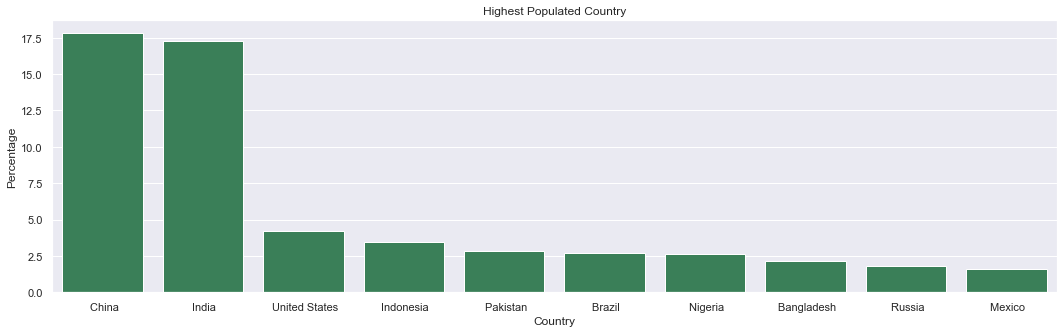

In [62]:
plt.figure(figsize=(18,5))
plt.title("Highest Populated Country")
sns.barplot(x=wiki_data.sort_values(by=["Population"],ascending=False)["Country"].head(10),
            y=wiki_data.sort_values(by=["Percentage"],ascending=False)["Percentage"].head(10),color='seagreen');